In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("data2.csv")

In [3]:
df.head()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3515418493460774,07/25,251,1
1,DOCTOR,80334,213134223583196,05/32,858,1
2,LAWYER,91552,4869615013764888,03/30,755,1
3,LAWYER,43623,341063356109385,01/29,160,1
4,DOCTOR,22962,4707418777543978402,11/30,102,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Profession          10000 non-null  object
 1   Income              10000 non-null  int64 
 2   Credit_card_number  10000 non-null  int64 
 3   Expiry              10000 non-null  object
 4   Security_code       10000 non-null  int64 
 5   Fraud               10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB


In [5]:
#cheak null value
df.isnull().sum()

Profession            0
Income                0
Credit_card_number    0
Expiry                0
Security_code         0
Fraud                 0
dtype: int64

In [6]:
df.describe

<bound method NDFrame.describe of      Profession  Income   Credit_card_number Expiry  Security_code  Fraud
0        DOCTOR   42509     3515418493460774  07/25            251      1
1        DOCTOR   80334      213134223583196  05/32            858      1
2        LAWYER   91552     4869615013764888  03/30            755      1
3        LAWYER   43623      341063356109385  01/29            160      1
4        DOCTOR   22962  4707418777543978402  11/30            102      0
...         ...     ...                  ...    ...            ...    ...
9995     DOCTOR    2705         502092127427  09/27            422      1
9996     LAWYER   37862      349490624391408  07/34            811      0
9997   ENGINEER   83152     4990903961714432  11/24            216      1
9998     DOCTOR   90620     4827611166572112  01/33            180      1
9999     LAWYER   94529     4906715586330631  12/29            399      1

[10000 rows x 6 columns]>

In [7]:
#eda
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Profession', ylabel='Income'>

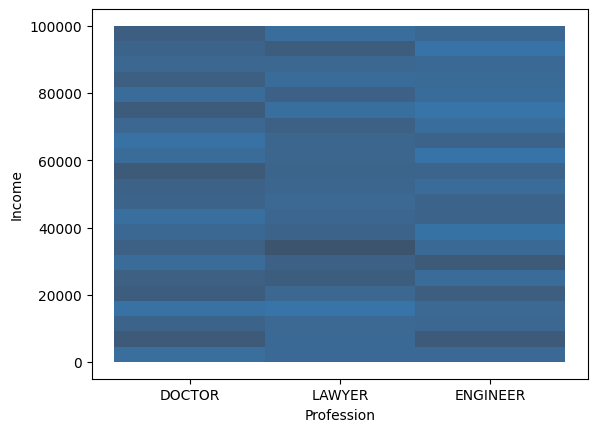

In [8]:
sns.histplot(x='Profession',y='Income',data=df)

<Axes: xlabel='Profession', ylabel='Expiry'>

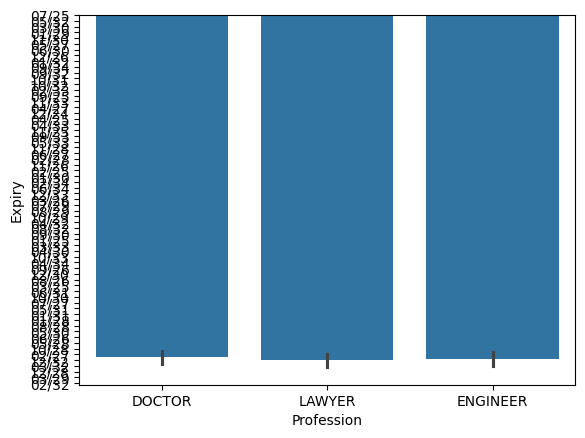

In [9]:
sns.barplot(x='Profession',y='Expiry',data=df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Profession          10000 non-null  object
 1   Income              10000 non-null  int64 
 2   Credit_card_number  10000 non-null  int64 
 3   Expiry              10000 non-null  object
 4   Security_code       10000 non-null  int64 
 5   Fraud               10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB


In [11]:
df['Fraud'].value_counts()

Fraud
1    5016
0    4984
Name: count, dtype: int64

In [12]:
#used label encoder
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")
                            

Profession: ['DOCTOR' 'LAWYER' 'ENGINEER']
Expiry: ['07/25' '05/32' '03/30' '01/29' '11/30' '05/27' '06/30' '12/26' '01/32'
 '09/34' '09/32' '10/31' '10/32' '02/33' '09/25' '11/33' '04/27' '12/24'
 '04/25' '04/33' '11/25' '09/33' '05/33' '11/28' '06/27' '02/28' '11/26'
 '02/25' '01/30' '02/34' '06/34' '12/33' '03/26' '07/29' '08/29' '10/29'
 '04/32' '08/32' '09/30' '01/25' '03/33' '04/30' '10/33' '04/34' '09/26'
 '12/30' '08/26' '03/25' '06/31' '10/30' '07/27' '05/31' '01/31' '01/28'
 '08/28' '05/30' '06/26' '05/28' '10/28' '02/27' '12/32' '03/32' '12/28'
 '03/29' '02/32' '03/34' '05/34' '03/28' '02/26' '02/31' '10/25' '03/31'
 '01/33' '06/25' '04/26' '01/34' '08/25' '07/34' '10/27' '04/29' '10/26'
 '04/28' '06/33' '07/31' '08/31' '02/30' '12/31' '11/24' '07/30' '12/29'
 '06/28' '03/27' '07/32' '07/26' '10/34' '02/29' '09/27' '01/27' '11/27'
 '09/29' '09/31' '04/31' '11/29' '05/26' '06/29' '07/33' '08/34' '08/33'
 '12/25' '11/31' '07/28' '11/32' '05/25' '08/30' '05/29' '12/27' '06/32'


In [13]:
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
    label_encoder=preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col]=label_encoder.transform(df[col])
    print(f"{col}: {df[col].unique()}")
    


Profession: [0 2 1]
Expiry: [ 60  47  25   4 106  42  55 113   7  89  87  96  97  18  80 109  32 111
  30  38 101  88  48 104  52  13 102  10   5  19  59 120  21  64  74  94
  37  77  85   0  28  35  98  39  81 117  71  20  56  95  62  46   6   3
  73  45  51  43  93  12 119  27 115  24  17  29  49  23  11  16  90  26
   8  50  31   9  70  69  92  34  91  33  58  66  76  15 118 100  65 116
  53  22  67  61  99  14  82   2 103  84  86  36 105  41  54  68  79  78
 112 107  63 108  40  75  44 114  57   1 110  72  83]


In [14]:
df.head()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,0,42509,3515418493460774,60,251,1
1,0,80334,213134223583196,47,858,1
2,2,91552,4869615013764888,25,755,1
3,2,43623,341063356109385,4,160,1
4,0,22962,4707418777543978402,106,102,0


In [15]:
X = df.drop(['Fraud'], axis=1)
y = df['Fraud']


In [16]:
df.head()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,0,42509,3515418493460774,60,251,1
1,0,80334,213134223583196,47,858,1
2,2,91552,4869615013764888,25,755,1
3,2,43623,341063356109385,4,160,1
4,0,22962,4707418777543978402,106,102,0


In [17]:
#model building
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [19]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def find_best_model(X, y):
    # Define the models and their hyperparameters
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000),
            'parameters': {
                'C': [1, 5, 10]  # Regularization strength
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5, 10]
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10, 20, 30, 100]
            }
        },
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1, 10, 20],
                'kernel': ['rbf', 'linear']
            }
        }
    }

    # List to store the results
    scores = []
    
    # Define cross-validation strategy
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    # Loop through each model and perform GridSearchCV
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_shuffle, return_train_score=False, n_jobs=-1)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
    
    # Return the results as a DataFrame
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'score'])

# Example usage (assuming X_train and y_train are defined)
best_models = find_best_model(X_train, y_train)
print(best_models)


                 model                            best_parameters     score
0  logistic_regression                                   {'C': 1}  0.505000
1        decision_tree  {'criterion': 'entropy', 'max_depth': 10}  0.505750
2        random_forest                       {'n_estimators': 20}  0.498875
3                  svm                 {'C': 20, 'kernel': 'rbf'}  0.518250


In [21]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 49%


In [22]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [23]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[549, 471],
       [558, 422]], dtype=int64)

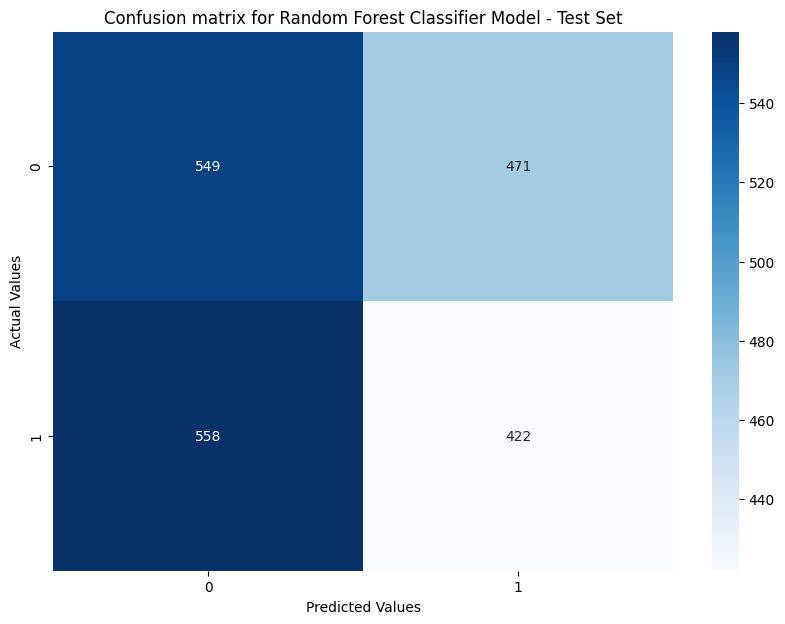

In [24]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [25]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 48.55%


In [26]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52      1020
           1       0.47      0.43      0.45       980

    accuracy                           0.49      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.48      0.49      0.48      2000



In [27]:
# Creating a confusion matrix for training set
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[3960,    4],
       [  10, 4026]], dtype=int64)

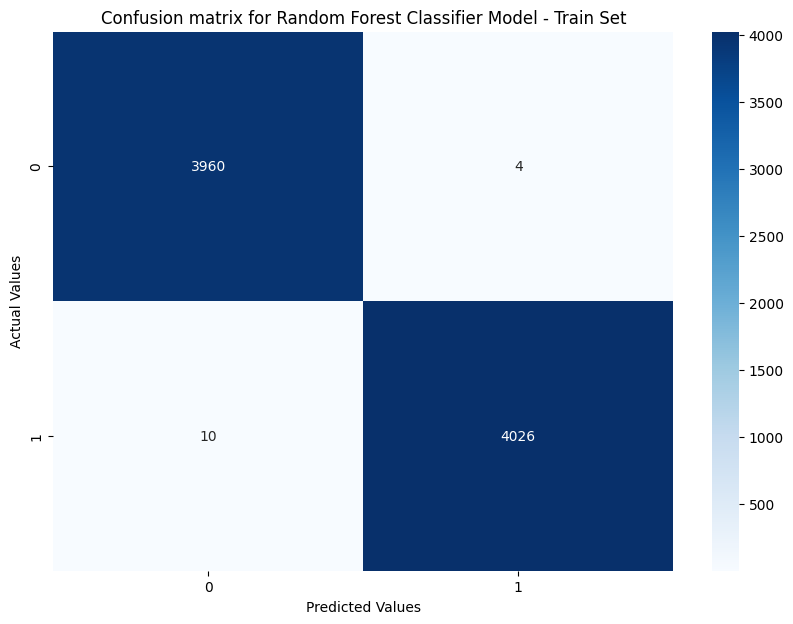

In [28]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [29]:
# Accuracy Score
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 99.82%


In [30]:
# Classification Report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3964
           1       1.00      1.00      1.00      4036

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

